# Lab Assignment 07
The objective of this lab assignment is to cluster customers of a telephone company (`data_lab_07.csv`), using different clustering techniques and evaluate the clusters found

#### Instructions:
Complete each task and question by filling in the blanks (`...`) with one or more lines of code or text. Tasks 1-11 and questions 1-5 are worth **0.5 points** each and questions 6-7 are worth **1 point** each (out of **10 points**).

#### Submission:
This assignment is due **Monday, November 18, at 11:59PM (Central Time)**.

This assignment must be submitted on Gradescope as a **PDF file** containing the completed code for each task and the corresponding output. Late submissions will be accepted within **0-12**  hours after the deadline with a **0.5-point (5%) penalty** and within **12-24** hours after the deadline with a **2-point (20%) penalty**. No late submissions will be accepted more than 24 hours after the deadline.

**This assignment is individual**. Offering or receiving any kind of unauthorized or unacknowledged assistance is a violation of the University’s academic integrity policies, will result in a grade of zero for the assignment, and will be subject to disciplinary action.

### Part 1: Hierarchical Clustering

In [75]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler  
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.cluster import KMeans, DBSCAN
from sklearn import metrics

In [76]:
# Load dataset and display the first five rows
data = pd.read_csv('data_lab_07.csv')
data.head()

,Account length,International plan,Voice mail plan,Number voice mail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


**Task 01 (of 11): Create a new numerical attribute named 'Total charge' that contains the sum of the attributes 'Total day charge', 'Total eve charge', and 'Total night charge'.**

In [77]:
data['Total charge'] = data['Total day charge'] + data['Total eve charge'] + data['Total night charge']

In [78]:
# Partition the dataset into attributes and true clusters (churned/non-churned)
# Consider only the following attributes: 'International plan', 'Total charge', and 'Customer service calls'
X = data[['International plan', 'Total charge', 'Customer service calls']]
Y = data['Churn']

**Task 02 (of 11): Standardize the attributes.**

In [79]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

**Task 03 (of 11): Cluster the dataset using hierarchical clustering with single linkage method.**
_Hint:_ Use single linkage as the method and Euclidean distance as the distance metric.

In [80]:
clustering = linkage(X_scaled, method = "single", metric = "euclidean")
clusters = fcluster(clustering, 2, criterion = 'maxclust')

**Task 04 (of 11): Plot contingency matrix and compute evaluation metrics for hierarchical clustering with single linkage method.**

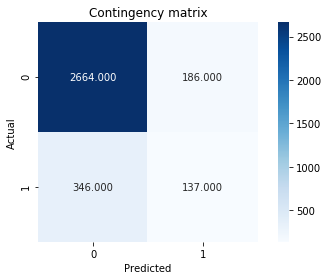

In [81]:
cont_matrix = metrics.cluster.contingency_matrix(Y, clusters)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

In [102]:
adjusted_rand_index = metrics.adjusted_rand_score(Y, clusters)
silhouette_coefficient = metrics.silhouette_score(X_scaled, clusters, metric = "euclidean")
print([adjusted_rand_index, silhouette_coefficient])
X_scaled
clusters

[0.017507021065270037, 0.5130278392459514]


array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

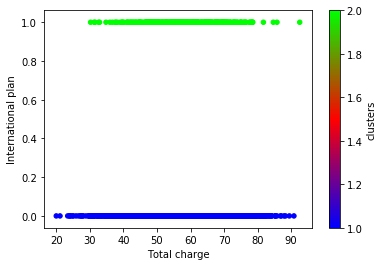

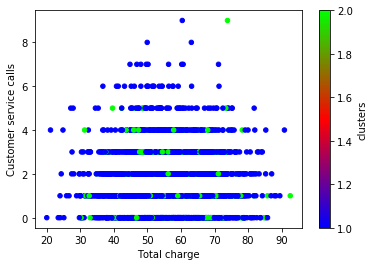

In [83]:
# Plot clusters found using hierarchical clustering with single linkage method
data['clusters'] = clusters
ax = data.plot(kind = 'scatter', x = 'Total charge', y = 'International plan', c = 'clusters', colormap = plt.cm.brg)
ax = data.plot(kind = 'scatter', x = 'Total charge', y = 'Customer service calls', c = 'clusters', colormap = plt.cm.brg)

**Question 01 (of 07): What can you conclude about the clusters found using hierarchical clustering with single linkage method from the plot and the evaluation metrics?**

**Answer:** There are poorly performing clusters. There is a distinctive clustering when looking at international plan due to the fact that international plan is binary. However, taking a look at customer service calls and total charge, there are no distinctions being made. This leads us to believe that the clustering is based solely on international plan, and so it is a poor clustering method.

**Task 05 (of 11): Cluster the dataset using hierarchical clustering with complete linkage method.**
_Hint:_ Use complete linkage as the method and Euclidean distance as the distance metric.

In [98]:
clustering = linkage(X_scaled, method = "complete", metric = "euclidean")
clusters = fcluster(clustering, 2, criterion = 'maxclust')

**Task 06 (of 11): Plot contingency matrix and compute evaluation metrics for hierarchical clustering with complete linkage method.**

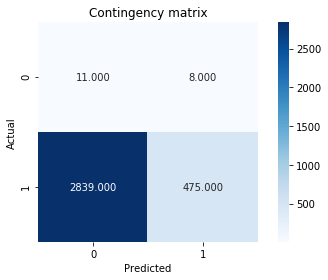

In [99]:
cont_matrix = metrics.cluster.contingency_matrix(clusters, Y)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

In [100]:
adjusted_rand_index = metrics.adjusted_rand_score(Y, clusters)
silhouette_coefficient = metrics.silhouette_score(X_scaled, clusters, metric = "euclidean")
print([adjusted_rand_index, silhouette_coefficient])

[0.017507021065270037, 0.5130278392459514]


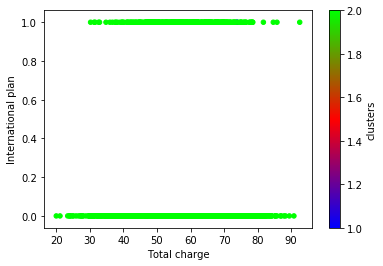

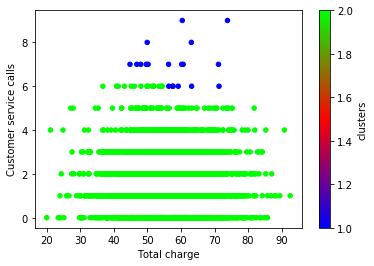

In [87]:
# Plot clusters found using hierarchical clustering with complete linkage method
data['clusters'] = clusters
ax = data.plot(kind = 'scatter', x = 'Total charge', y = 'International plan', c = 'clusters', colormap = plt.cm.brg)
ax = data.plot(kind = 'scatter', x = 'Total charge', y = 'Customer service calls', c = 'clusters', colormap = plt.cm.brg)

**Question 02 (of 07): What can you conclude about the clusters found using hierarchical clustering with complete linkage method from the plot and the evaluation metrics?**

**Answer:**  The complete linkage method does a poor performance of international plan. However, we can see that with customer service calls and total charge, there seems to be some formation of an upper right clustering vs. the remainder of the graph. This leads us to believe that there is some clustering being done based on customer service calls and total charge. That being said, it still does not perform all that well, so we disregard complete linkage clustering.

### Part 2: K-Means Clustering

**Task 07 (of 11): Cluster the dataset using K-Means clustering.**
_Hint:_ Use random initialization of centroids, 10 iterations, and set parameter `random_state` to 0.

In [88]:
clustering = KMeans(init = 'random', random_state = 0, n_init = 10).fit(X_scaled)
clusters = clustering.labels_

**Task 08 (of 11): Plot contingency matrix and compute evaluation metrics for K-Means clustering.**

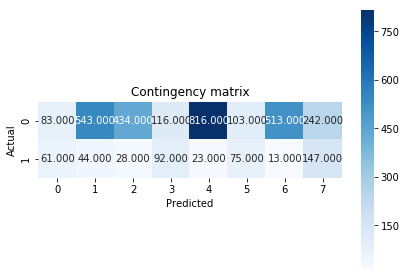

In [89]:
cont_matrix = metrics.cluster.contingency_matrix(Y, clusters)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

In [90]:
adjusted_rand_index = metrics.adjusted_rand_score(Y, clusters)
silhouette_coefficient = metrics.silhouette_score(X_scaled, clusters, metric="euclidean")
print([adjusted_rand_index, silhouette_coefficient])

[0.053879061838734726, 0.36389863498132186]


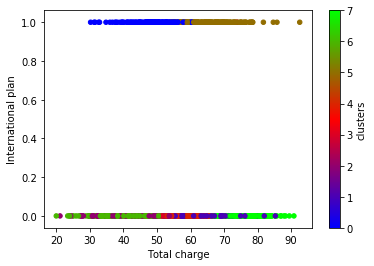

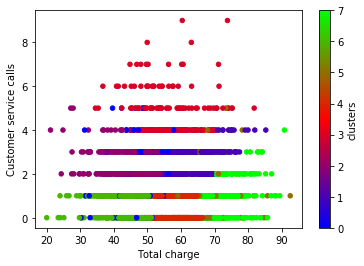

In [91]:
# Plot clusters found using K-Means clustering
data['clusters'] = clusters
ax = data.plot(kind = 'scatter', x = 'Total charge', y = 'International plan', c = 'clusters', colormap = plt.cm.brg)
ax = data.plot(kind = 'scatter', x = 'Total charge', y = 'Customer service calls', c = 'clusters', colormap = plt.cm.brg)
# ax.set(title = 'iris data', xlabel = 'petal width', ylabel = 'petal length')

**Question 03 (of 07): What can you conclude about the clusters found using K-Means clustering from the plot and the evaluation metrics?**

**Answer:** This clustering looks to make some strong separations when observing total charge and customer service calls. Based on international plan, there is a very wide spread, but two large clusters when international plan is set to 1. The clusters are poorly defined, as we can see that the red most cluster ranges from the bottom to the top of total charge, and accounts for outliers. Additionally, we see seeping blue all around the center and bottom left of the second chart. We consider this to be not the best clustering technique for this data.

### Part 3: DBSCAN

**Task 09 (of 11): Cluster the dataset using DBSCAN.**
_Hint:_ Use parameters `Eps=2`, `MinPts=5`, and Euclidean distance as the distance metric.

In [92]:
clustering = DBSCAN(eps = 2, min_samples = 5, metric = "euclidean").fit(X_scaled)
clusters = clustering.labels_

**Task 10 (of 11): Plot contingency matrix and compute evaluation metrics for DBSCAN.**

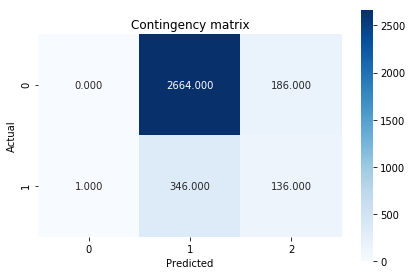

In [93]:
cont_matrix = metrics.cluster.contingency_matrix(Y, clusters)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

In [94]:
adjusted_rand_index = metrics.adjusted_rand_score(Y, clusters)
silhouette_coefficient = metrics.silhouette_score(X_scaled, clusters, metric = "euclidean")
print([adjusted_rand_index, silhouette_coefficient])

[0.20184369179051267, 0.556193882912843]


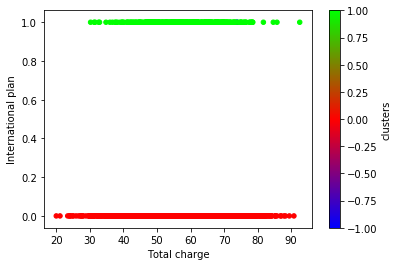

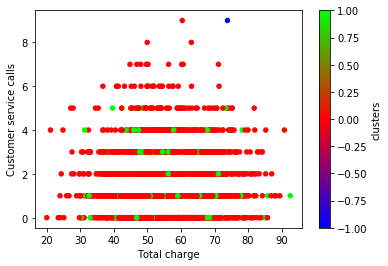

In [95]:
# Plot clusters found using DBSCAN
data['clusters'] = clusters
ax = data.plot(kind = 'scatter', x = 'Total charge', y = 'International plan', c = 'clusters', colormap = plt.cm.brg)
ax = data.plot(kind = 'scatter', x = 'Total charge', y = 'Customer service calls', c = 'clusters', colormap = plt.cm.brg)
# ax.set(title = 'iris data', xlabel = 'petal width', ylabel = 'petal length')

**Question 04 (of 07): How many clusters were found using DBSCAN?**

**Answer:** There were 3 clusters found using DBScan, but one cluster was considered to be a single point.

**Question 05 (of 07): What can you conclude about the clusters found using DBSCAN from the plot and the evaluation metrics?**

**Answer:** There is some good clustering based on interntional plan. However, similar to our single linkage clustering, the green is sparsely spread out and the red is deep everywhere. This leads us to believe that it is mostly clustering on international plan. Additionally, it says there is a single top right cluster of one point, which does not make sense for a final cluster outside of being an extreme outlier. 

**Question 06 (of 07): Which of the clustering techniques had the best performance?**

**Answer:** Arguably, I would debate that the k-means clustering had the best performance. While it is still poor in results, the majority of the clusters are well defined and does distinguish clusters even when accounting for the three points of total charge, service calls, and international plan. 

**Task 11 (of 11): Compute evaluation metrics for the true clusters of the data (churned/non-churned).**

In [96]:
silhouette_coefficient = metrics.silhouette_score(X_scaled, Y, metric = "euclidean")
print(silhouette_coefficient)

0.29452252272489277


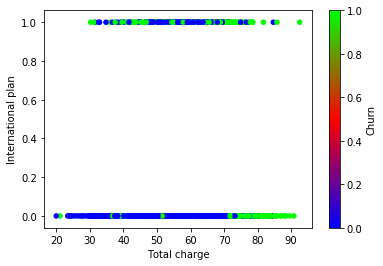

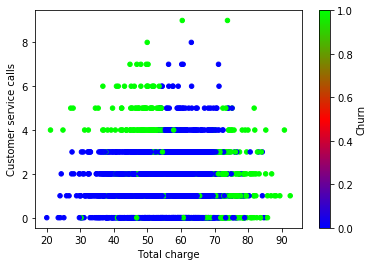

In [97]:
# Plot true clusters (churned/non-churned)
ax = data.plot(kind = 'scatter', x = 'Total charge', y = 'International plan', c = 'Churn', colormap = plt.cm.brg)
ax = data.plot(kind = 'scatter', x = 'Total charge', y = 'Customer service calls', c = 'Churn', colormap = plt.cm.brg)

**Question 07 (of 07): What can you conclude about the data from the plot and the evaluation metrics?**

**Answer:** The data from the plot shows that these three attributes do not show meaningful separation between churn and non churned rows. That is, there is a little bit of both in every single region and it is hard to distinguish each from another. Because of this, we can say that clustering is not the best method at finding similarities between churned rows and nonchurned rows.